### Fake News Detection

![Image Description](img.jpg)

### Importing required library
Here I am going to importing some of the required library, if extra library is required to install It will be install later on.

In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string
import json

### Inserting fake and real dataset

In [65]:
df_fake = pd.read_csv("Fake.csv")
df_true = pd.read_csv("True.csv")

In [66]:
df_fake.head(5)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [67]:
df_true.head(5)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


Inserting a column called "class" for fake and real news dataset to categories fake and true news.

In [68]:
df_fake["class"] = 0
df_true["class"] = 1

Removing last 10 rows from both the dataset, for manual testing  

In [69]:
df_fake.shape, df_true.shape

((23481, 5), (21417, 5))

In [70]:
df_fake_manual_testing = df_fake.tail(100)
for i in range(23480,23380,-1):
    df_fake.drop([i], axis = 0, inplace = True)
df_true_manual_testing = df_true.tail(100)
for i in range(21416,21316,-1):
    df_true.drop([i], axis = 0, inplace = True)

In [71]:
df_fake.shape, df_true.shape

((23381, 5), (21317, 5))

Merging the manual testing dataframe in single dataset and save it in a csv file

In [72]:
df_fake_manual_testing["class"] = 0
df_true_manual_testing["class"] = 1

C:\Users\omsag\AppData\Local\Temp\ipykernel_10164\860779283.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fake_manual_testing["class"] = 0
C:\Users\omsag\AppData\Local\Temp\ipykernel_10164\860779283.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_true_manual_testing["class"] = 1


In [73]:
df_fake_manual_testing.head(10)

,title,text,subject,date,class
23381,Hillary Clinton: “Victory Fund” Gets Massive C...,Wall Street on ParadeAt the Democratic debate ...,Middle-east,"April 8, 2016",0
23382,Windows 10 is Stealing Your Bandwidth (You Mig...,21st Century Wire says We ve heard a lot of no...,Middle-east,"April 7, 2016",0
23383,BOILER ROOM – EP #51 – Social Rejects & Politi...,Tune in to the Alternate Current Radio Network...,Middle-east,"April 6, 2016",0
23384,REVEALED: The CIA Ran LSD Sex Houses in San Fr...,Gary Kamiya SF ChronicleOn an elegant dead-end...,Middle-east,"April 6, 2016",0
23385,Utah Ranchers Vow to Stand Up to Government Ab...,"Sam Levin The GuardianOn 23 January, a group o...",Middle-east,"April 5, 2016",0
23386,FLASHBACK: Florida Couple Nearly ‘Forecloses’ ...,21st Century Wire says After the great crash o...,Middle-east,"April 5, 2016",0
23387,EXPOSED: How US-Backed War on Syria Helped ISI...,ABC News PhotoDaniel Lazare Consortium NewsWh...,Middle-east,"April 4, 2016",0
23388,IRAQ 1991: US Carpet Bombs ‘Highway of Death’,ROAR MagI want to give testimony on what are c...,Middle-east,"April 3, 2016",0
23389,"David Icke on The Hillary, Donald & Bernie Show",21st Century Wire says Author David Icke break...,Middle-east,"April 2, 2016",0
23390,"WHEN IN ROME: Erdogan Thugs Rough-up Press, Pr...","21st Century Wire says NATO s ugly stepchild, ...",Middle-east,"April 1, 2016",0


In [74]:
df_true_manual_testing.head(10)

,title,text,subject,date,class
21317,Saudi-led force admits strike in Yemen's capit...,RIYADH (Reuters) - A Saudi-led Arab coalition ...,worldnews,"August 26, 2017",1
21318,Italy's interior minister meets Libyan mayors ...,MILAN (Reuters) - Italian Interior Minister Ma...,worldnews,"August 26, 2017",1
21319,"After Yemeni air strike, little girl is family...",SANAA (Reuters) - Her bruised eyes still swoll...,worldnews,"August 26, 2017",1
21320,Man with sword injures police outside UK Queen...,(Reuters) - A man who assaulted police officer...,worldnews,"August 25, 2017",1
21321,Chinese government advisor says more Mandarin ...,BEIJING (Reuters) - Not enough effort is being...,worldnews,"August 26, 2017",1
21322,Thousands rally for gay marriage in Australia ...,SYDNEY (Reuters) - Thousands of people rallied...,worldnews,"August 26, 2017",1
21323,More than a thousand turn Philippine funeral t...,MANILA (Reuters) - More than a thousand people...,worldnews,"August 26, 2017",1
21324,"U.S. Black Hawk helicopter crashes off Yemen, ...",WASHINGTON (Reuters) - A U.S. Black Hawk helic...,worldnews,"August 26, 2017",1
21325,Prosecutors target Guatemala president over ca...,GUATEMALA CITY (Reuters) - Guatemala s attorne...,worldnews,"August 25, 2017",1
21326,Trump slaps sanctions on Venezuela; Maduro see...,CARACAS/WASHINGTON/ (Reuters) - U.S. President...,worldnews,"August 25, 2017",1


In [75]:
df_manual_testing = pd.concat([df_fake_manual_testing,df_true_manual_testing], axis = 0)
df_manual_testing.to_csv("manual_testing.csv")

Merging the main fake and true dataframe

In [76]:
df_marge = pd.concat([df_fake, df_true], axis =0 )
df_marge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [77]:
df_marge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

#### "title",  "subject" and "date" columns is not required for detecting the fake news, so I am going to drop the columns.

In [78]:
df = df_marge.drop(["title","subject","date"], axis = 1)

In [79]:
df.isnull().sum()

text     0
class    0
dtype: int64

#### Randomly shuffling the dataframe

In [80]:
df = df.sample(frac = 1)

In [81]:
df.head()

,text,class
17365,Another positive step towards restoring our fr...,0
4429,"WASHINGTON (Reuters) - In a last-ditch effort,...",1
3087,"By now you have seen, or at least heard about ...",0
1643,MELBOURNE (Reuters) - Lisa De Vanna once had t...,1
16376,I wrote AB 2466 because I want to send a mess...,0


In [82]:
df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True)

In [83]:
df.columns

Index(['text', 'class'], dtype='object')

In [84]:
df.shape

(44698, 2)

In [85]:
df.head()

,text,class
0,Another positive step towards restoring our fr...,0
1,"WASHINGTON (Reuters) - In a last-ditch effort,...",1
2,"By now you have seen, or at least heard about ...",0
3,MELBOURNE (Reuters) - Lisa De Vanna once had t...,1
4,I wrote AB 2466 because I want to send a mess...,0


#### Creating a function to convert the text in lowercase, remove the extra space, special chr., ulr and links.

In [86]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [87]:
df["text"] = df["text"].apply(wordopt)

#### Defining dependent and independent variable as x and y

In [88]:
x = df["text"]
y = df["class"]

#### Splitting the dataset into training set and testing set.

In [89]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=42)
print(x_test)

26676    after more than seven years of republicans des...
14049    donald trump must be forced to resign or be im...
24205     by vin armanihillary clinton continues to bla...
314      president barack obama singlehandedly caused a...
25073    the daily caller is disgusting  any media outl...
                               ...                        
15159    beijing  reuters    china and the united state...
39702    washington  reuters    the white house said on...
31203    from the amazing ann corcoran s refugee resett...
31893    washington  reuters    lawmakers in the u s  h...
24428    the fact that most of the country despises don...
Name: text, Length: 13410, dtype: object


#### Convert text to vectors

In [90]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
import joblib
import os

In [91]:
vectorization = TfidfVectorizer(max_features=20, max_df=0.3, min_df=20)   # More restrictive TF-IDF
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)
joblib.dump(vectorization, 'models/vectorization.pkl')
# Perform t-SNE on the TF-IDF features
"""tsne = TSNE(n_components=2, random_state=0)
xv_test_2d = tsne.fit_transform(xv_test.toarray())

# Create a DataFrame for plotting
df_tsne = pd.DataFrame(xv_test_2d, columns=['Dim1', 'Dim2'])

# Plotting the t-SNE result
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Dim1', y='Dim2', data=df_tsne, alpha=0.7)
plt.title('t-SNE Visualization of TF-IDF Features')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()
print(xv_test)"""

"tsne = TSNE(n_components=2, random_state=0)\nxv_test_2d = tsne.fit_transform(xv_test.toarray())\n\n# Create a DataFrame for plotting\ndf_tsne = pd.DataFrame(xv_test_2d, columns=['Dim1', 'Dim2'])\n\n# Plotting the t-SNE result\nplt.figure(figsize=(10, 6))\nsns.scatterplot(x='Dim1', y='Dim2', data=df_tsne, alpha=0.7)\nplt.title('t-SNE Visualization of TF-IDF Features')\nplt.xlabel('Component 1')\nplt.ylabel('Component 2')\nplt.show()\nprint(xv_test)"

### 1. Logistic Regression

In [92]:
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression

In [93]:
LR = LogisticRegression(C=0.001, max_iter=200,warm_start=True)
LR.fit(xv_train,y_train)

LogisticRegression(C=0.001, max_iter=200, warm_start=True)

In [94]:
pred_lr=LR.predict(xv_test)

In [95]:
LR.score(xv_test, y_test)

0.7217002237136465

In [96]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.69      0.83      0.75      6954
           1       0.77      0.61      0.68      6456

    accuracy                           0.72     13410
   macro avg       0.73      0.72      0.72     13410
weighted avg       0.73      0.72      0.72     13410



In [97]:
# Ensure 'Models' folder exists (create it if not)
models_dir = 'Models'
if not os.path.exists(models_dir):
    os.makedirs(models_dir)

    
# Save the model with the algorithm name in 'Models' folder
model_filename = 'Models/LogisticRegression.pkl'
joblib.dump(LR, model_filename)
print(f"Model saved as {model_filename}")

Model saved as Models/LogisticRegression.pkl


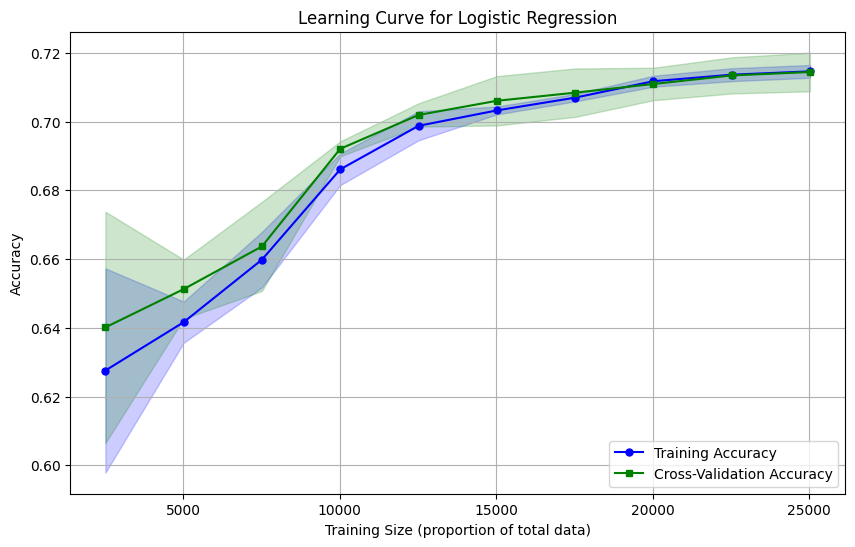

In [98]:
# Define the training sizes
train_sizes = np.linspace(0.1, 1.0, 10)

# Generate the learning curve data
train_sizes, train_scores, test_scores = learning_curve(LR, xv_train, y_train, train_sizes=train_sizes, cv=5, n_jobs=-1, scoring='accuracy')

# Compute the mean and standard deviation of the scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='s', markersize=5, label='Cross-Validation Accuracy')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color='green')
plt.title('Learning Curve for Logistic Regression')
plt.xlabel('Training Size (proportion of total data)')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### 2. Decision Tree Classification

In [99]:
from sklearn.tree import DecisionTreeClassifier

In [100]:
DT = DecisionTreeClassifier(max_depth=5, min_samples_split=10, max_features=10)
DT.fit(xv_train, y_train)

# Get the underlying DecisionTree object
tree = DT.tree_

# Get the number of nodes in the tree
num_nodes = tree.node_count

print(f"Number of nodes in the tree: {num_nodes}")


Number of nodes in the tree: 63


In [101]:
pred_dt = DT.predict(xv_test)

In [102]:
DT.score(xv_test, y_test)

0.6875466070096943

In [103]:
accuracy = DT.score(xv_test, y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')
print(classification_report(y_test, pred_dt))

Accuracy: 68.75%
              precision    recall  f1-score   support

           0       0.65      0.88      0.75      6954
           1       0.79      0.48      0.60      6456

    accuracy                           0.69     13410
   macro avg       0.72      0.68      0.67     13410
weighted avg       0.71      0.69      0.67     13410



In [104]:
# Ensure 'Models' folder exists (create it if not)
models_dir = 'Models'
if not os.path.exists(models_dir):
    os.makedirs(models_dir)

# Save the Decision Tree model with the algorithm name in 'Models' folder
model_filename = os.path.join(models_dir, 'DecisionTree.pkl')
joblib.dump(DT, model_filename)
print(f"Model saved as {model_filename}")


Model saved as Models\DecisionTree.pkl


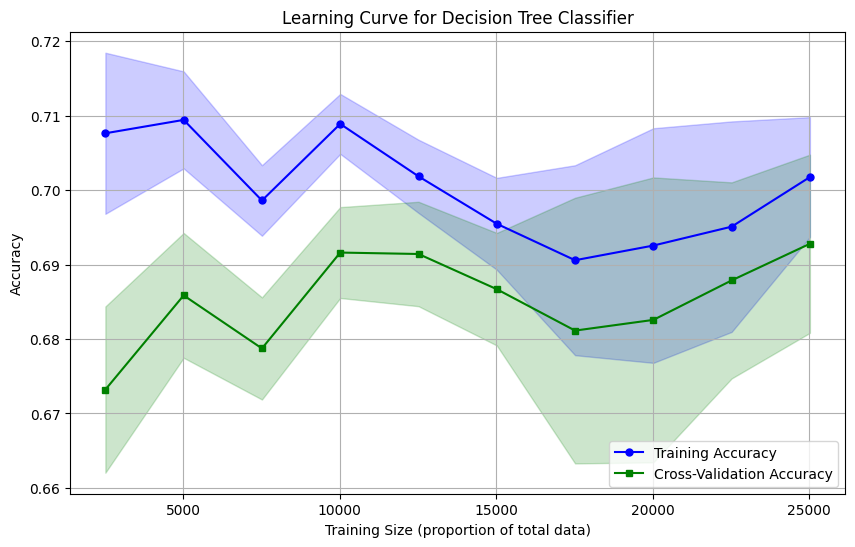

In [105]:
# Define the training sizes
train_sizes = np.linspace(0.1, 1.0, 10)

# Generate the learning curve data
train_sizes, train_scores, test_scores = learning_curve(DT, xv_train, y_train, train_sizes=train_sizes, cv=5, n_jobs=-1, scoring='accuracy')

# Compute the mean and standard deviation of the scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='s', markersize=5, label='Cross-Validation Accuracy')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color='green')
plt.title('Learning Curve for Decision Tree Classifier')
plt.xlabel('Training Size (proportion of total data)')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### 3. Gradient Boosting Classifier

In [106]:
from sklearn.ensemble import GradientBoostingClassifier

In [107]:
GBC = GradientBoostingClassifier(
    n_estimators=100,     # fewer trees
    learning_rate=0.01,   # higher learning rate
    max_depth=1,         # shallower trees
    random_state=0
)
GBC.fit(xv_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=1, random_state=0)

In [108]:
pred_gbc = GBC.predict(xv_test)

In [109]:
GBC.score(xv_test, y_test)

0.655406413124534

In [110]:
print(f'Accuracy: {GBC.score(xv_test, y_test) * 100:.2f}%')
print(classification_report(y_test, pred_gbc))

Accuracy: 65.54%
              precision    recall  f1-score   support

           0       0.62      0.88      0.73      6954
           1       0.76      0.42      0.54      6456

    accuracy                           0.66     13410
   macro avg       0.69      0.65      0.63     13410
weighted avg       0.69      0.66      0.64     13410



In [111]:
# Ensure 'Models' folder exists (create it if not)
models_dir = 'Models'
if not os.path.exists(models_dir):
    os.makedirs(models_dir)

# Save the Gradient Boosting Classifier model with the algorithm name in 'Models' folder
model_filename = os.path.join(models_dir, 'GradientBoostingClassifier.pkl')
joblib.dump(GBC, model_filename)
print(f"Model saved as {model_filename}")


Model saved as Models\GradientBoostingClassifier.pkl


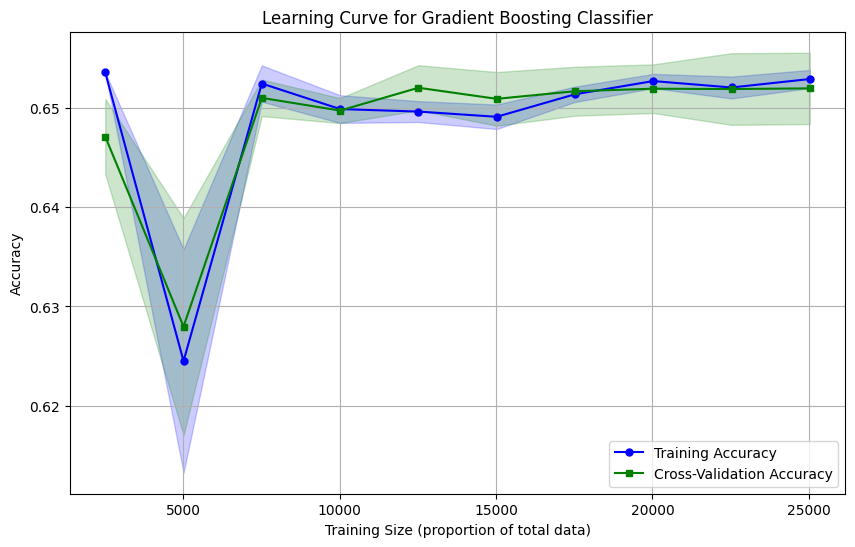

In [112]:
# Define the training sizes
train_sizes = np.linspace(0.1, 1.0, 10)

# Generate the learning curve data
train_sizes, train_scores, test_scores = learning_curve(GBC, xv_train, y_train, train_sizes=train_sizes, cv=5, n_jobs=-1, scoring='accuracy')

# Compute the mean and standard deviation of the scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='s', markersize=5, label='Cross-Validation Accuracy')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color='green')
plt.title('Learning Curve for Gradient Boosting Classifier')
plt.xlabel('Training Size (proportion of total data)')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


### 4. Random Forest Classifier

In [113]:
from sklearn.ensemble import RandomForestClassifier

In [114]:
for n_trees in [10]:
    RFC = RandomForestClassifier(n_estimators=n_trees, random_state=0)
    RFC.fit(xv_train, y_train)
    pred_rfc = RFC.predict(xv_test)

In [115]:
pred_rfc = RFC.predict(xv_test)

In [116]:
RFC.score(xv_test, y_test)

0.7676360924683072

In [117]:
print(f'Accuracy: {RFC.score(xv_test, y_test) * 100:.2f}%')
print(classification_report(y_test, pred_rfc))

Accuracy: 76.76%
              precision    recall  f1-score   support

           0       0.75      0.83      0.79      6954
           1       0.79      0.70      0.74      6456

    accuracy                           0.77     13410
   macro avg       0.77      0.77      0.77     13410
weighted avg       0.77      0.77      0.77     13410



In [118]:
# Ensure 'Models' folder exists (create it if not)
models_dir = 'Models'
if not os.path.exists(models_dir):
    os.makedirs(models_dir)

# Save the Random Forest Classifier model with the algorithm name in 'Models' folder
model_filename = os.path.join(models_dir, 'RandomForestClassifier.pkl')
joblib.dump(RFC, model_filename)
print(f"Model saved as {model_filename}")


Model saved as Models\RandomForestClassifier.pkl


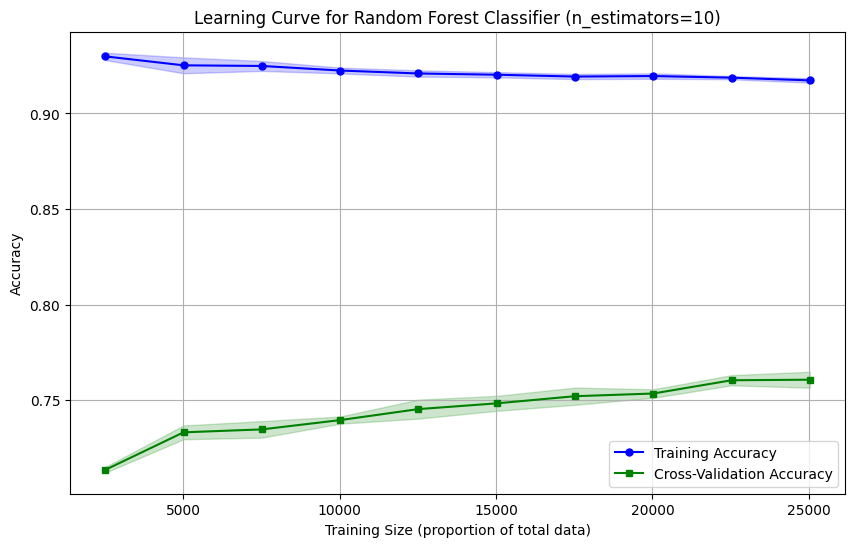

In [119]:
# Define the training sizes
train_sizes = np.linspace(0.1, 1.0, 10)

# Generate the learning curve data
train_sizes, train_scores, test_scores = learning_curve(RFC, xv_train, y_train, train_sizes=train_sizes, cv=5, n_jobs=-1, scoring='accuracy')

# Compute the mean and standard deviation of the scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='s', markersize=5, label='Cross-Validation Accuracy')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color='green')
plt.title('Learning Curve for Random Forest Classifier (n_estimators=10)')
plt.xlabel('Training Size (proportion of total data)')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# 5. RNN

In [120]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from sklearn.metrics import mean_squared_error, classification_report
import numpy as np
import scipy  # Import the scipy library
import os  # To handle directories

# Assume xv_train, y_train, xv_test, and y_test are your training and testing data

# Convert sparse matrices to dense arrays if necessary
if isinstance(xv_train, scipy.sparse.spmatrix):
    xv_train = xv_train.toarray()
if isinstance(xv_test, scipy.sparse.spmatrix):
    xv_test = xv_test.toarray()

# Reshape the data to match RNN input requirements
xv_train = xv_train.reshape((xv_train.shape[0], 1, xv_train.shape[1]))
xv_test = xv_test.reshape((xv_test.shape[0], 1, xv_test.shape[1]))

# Print shapes to debug
print(f'xv_train shape: {xv_train.shape}')
print(f'xv_test shape: {xv_test.shape}')

# Create the RNN model
RNN_model = Sequential()
RNN_model.add(SimpleRNN(units=50, return_sequences=True, input_shape=(1, xv_train.shape[2])))  # Adjust input_shape to match your features
RNN_model.add(SimpleRNN(units=50))
RNN_model.add(Dense(1, activation='sigmoid'))  # Activation set to 'sigmoid' for binary classification
RNN_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the RNN model to the training data and capture the history
history = RNN_model.fit(xv_train, y_train, epochs=5, batch_size=32, verbose=2, validation_data=(xv_test, y_test))

# Save the RNN model
models_dir = 'Models'
if not os.path.exists(models_dir):
    os.makedirs(models_dir)

model_filename = os.path.join(models_dir, 'RNN_model.h5')
RNN_model.save(model_filename)
print(f'Model saved as {model_filename}')

# Make predictions on the test data with RNN model
y_pred_RNN = RNN_model.predict(xv_test)

# Convert probabilities to binary labels
y_pred_labels_RNN = (y_pred_RNN > 0.5).astype(int)

# Evaluate the RNN model using MSE (mean squared error)
mse_RNN = mean_squared_error(y_test, y_pred_RNN)
print(f'RNN Mean Squared Error: {mse_RNN}')

# Evaluate the model's performance on the test data
loss_RNN, accuracy_RNN = RNN_model.evaluate(xv_test, y_test)
print(f'RNN Loss: {loss_RNN}')
print(f'RNN Accuracy: {accuracy_RNN}')

# Calculate precision, recall, and f1-score
report_RNN = classification_report(y_test, y_pred_labels_RNN, target_names=['Class 0', 'Class 1'])
print(f'Classification Report for RNN:\n{report_RNN}')


xv_train shape: (31288, 1, 20)
xv_test shape: (13410, 1, 20)
Epoch 1/5
978/978 - 4s - loss: 0.5520 - accuracy: 0.7155 - val_loss: 0.5403 - val_accuracy: 0.7298 - 4s/epoch - 4ms/step
Epoch 2/5
978/978 - 2s - loss: 0.5445 - accuracy: 0.7259 - val_loss: 0.5385 - val_accuracy: 0.7316 - 2s/epoch - 2ms/step
Epoch 3/5
978/978 - 2s - loss: 0.5437 - accuracy: 0.7240 - val_loss: 0.5387 - val_accuracy: 0.7318 - 2s/epoch - 2ms/step
Epoch 4/5
978/978 - 2s - loss: 0.5429 - accuracy: 0.7263 - val_loss: 0.5378 - val_accuracy: 0.7344 - 2s/epoch - 2ms/step
Epoch 5/5
978/978 - 2s - loss: 0.5416 - accuracy: 0.7274 - val_loss: 0.5365 - val_accuracy: 0.7323 - 2s/epoch - 2ms/step


C:\Users\omsag\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved as Models\RNN_model.h5
420/420 [==============================] - 1s 1ms/step
RNN Mean Squared Error: 0.1793826049204708
420/420 [==============================] - 1s 1ms/step - loss: 0.5365 - accuracy: 0.7323
RNN Loss: 0.5365152359008789
RNN Accuracy: 0.7322893142700195
Classification Report for RNN:
              precision    recall  f1-score   support

     Class 0       0.73      0.77      0.75      6954
     Class 1       0.74      0.69      0.71      6456

    accuracy                           0.73     13410
   macro avg       0.73      0.73      0.73     13410
weighted avg       0.73      0.73      0.73     13410



# 6. LSTM

In [121]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error, classification_report
import numpy as np
import scipy  # Import the scipy library
import os  # To handle directories

# Assume xv_train, y_train, xv_test, and y_test are your training and testing data

# Convert sparse matrices to dense arrays if necessary
if isinstance(xv_train, scipy.sparse.spmatrix):
    xv_train = xv_train.toarray()
if isinstance(xv_test, scipy.sparse.spmatrix):
    xv_test = xv_test.toarray()

# Check the shape of the input data
print(f'Original xv_train shape: {xv_train.shape}')
print(f'Original xv_test shape: {xv_test.shape}')

# No need to reshape since the input already has the shape (samples, timesteps, features)
# xv_train = xv_train.reshape((xv_train.shape[0], 1, xv_train.shape[1]))  # (samples, timesteps, features)
# xv_test = xv_test.reshape((xv_test.shape[0], 1, xv_test.shape[1]))  # (samples, timesteps, features)

# Print shapes to debug
print(f'Reshaped xv_train shape: {xv_train.shape}')
print(f'Reshaped xv_test shape: {xv_test.shape}')

# Create the LSTM model
LSTM_model = Sequential()
LSTM_model.add(LSTM(units=50, return_sequences=True, input_shape=(1, xv_train.shape[2])))  # Adjust input_shape to match your features
LSTM_model.add(LSTM(units=50))
LSTM_model.add(Dense(1, activation='sigmoid'))  # Activation set to 'sigmoid' for binary classification
LSTM_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the LSTM model to the training data and capture the history
history = LSTM_model.fit(xv_train, y_train, epochs=5, batch_size=32, verbose=2, validation_data=(xv_test, y_test))

# Save the LSTM model
models_dir = 'Models'
if not os.path.exists(models_dir):
    os.makedirs(models_dir)

model_filename = os.path.join(models_dir, 'LSTM_model.h5')
LSTM_model.save(model_filename)
print(f'Model saved as {model_filename}')

# Make predictions on the test data with LSTM model
y_pred_LSTM = LSTM_model.predict(xv_test)

# Convert probabilities to binary labels
y_pred_labels_LSTM = (y_pred_LSTM > 0.5).astype(int)

# Evaluate the LSTM model using MSE (mean squared error)
mse_LSTM = mean_squared_error(y_test, y_pred_LSTM)
print(f'LSTM Mean Squared Error: {mse_LSTM}')

# Evaluate the model's performance on the test data
loss_LSTM, accuracy_LSTM = LSTM_model.evaluate(xv_test, y_test)
print(f'LSTM Loss: {loss_LSTM}')
print(f'LSTM Accuracy: {accuracy_LSTM}')

# Calculate precision, recall, and f1-score
report_LSTM = classification_report(y_test, y_pred_labels_LSTM, target_names=['Class 0', 'Class 1'])
print(f'Classification Report for LSTM:\n{report_LSTM}')


Original xv_train shape: (31288, 1, 20)
Original xv_test shape: (13410, 1, 20)
Reshaped xv_train shape: (31288, 1, 20)
Reshaped xv_test shape: (13410, 1, 20)
Epoch 1/5
978/978 - 7s - loss: 0.5572 - accuracy: 0.7126 - val_loss: 0.5322 - val_accuracy: 0.7349 - 7s/epoch - 7ms/step
Epoch 2/5
978/978 - 3s - loss: 0.5317 - accuracy: 0.7336 - val_loss: 0.5186 - val_accuracy: 0.7447 - 3s/epoch - 3ms/step
Epoch 3/5
978/978 - 3s - loss: 0.5152 - accuracy: 0.7449 - val_loss: 0.5027 - val_accuracy: 0.7529 - 3s/epoch - 3ms/step
Epoch 4/5
978/978 - 3s - loss: 0.5052 - accuracy: 0.7495 - val_loss: 0.4982 - val_accuracy: 0.7567 - 3s/epoch - 3ms/step
Epoch 5/5
978/978 - 3s - loss: 0.5007 - accuracy: 0.7530 - val_loss: 0.4949 - val_accuracy: 0.7584 - 3s/epoch - 3ms/step
Model saved as Models\LSTM_model.h5


C:\Users\omsag\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


420/420 [==============================] - 1s 1ms/step
LSTM Mean Squared Error: 0.16353789752929318
420/420 [==============================] - 1s 1ms/step - loss: 0.4949 - accuracy: 0.7584
LSTM Loss: 0.49489080905914307
LSTM Accuracy: 0.7583892345428467
Classification Report for LSTM:
              precision    recall  f1-score   support

     Class 0       0.75      0.80      0.77      6954
     Class 1       0.77      0.71      0.74      6456

    accuracy                           0.76     13410
   macro avg       0.76      0.76      0.76     13410
weighted avg       0.76      0.76      0.76     13410



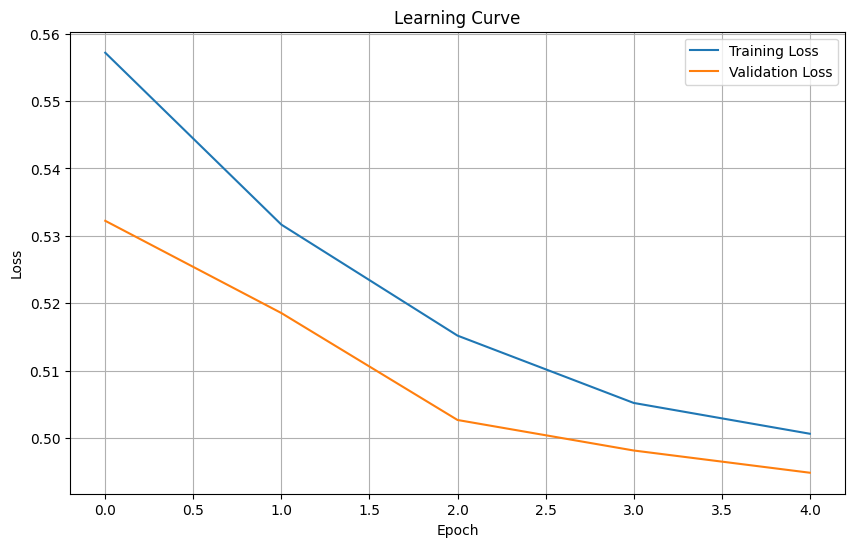

In [122]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Learning Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


# 7. BiLSTM

In [123]:
from keras.models import Sequential
from keras.layers import Bidirectional, LSTM, Dense
from sklearn.metrics import mean_squared_error, classification_report
import numpy as np
import scipy
import math
import os  # To handle directories

# Assume xv_train, y_train, xv_test, and y_test are your training and testing data

# Convert sparse matrices to dense arrays if necessary
if isinstance(xv_train, scipy.sparse.spmatrix):
    xv_train = xv_train.toarray()
if isinstance(xv_test, scipy.sparse.spmatrix):
    xv_test = xv_test.toarray()

# Create temporary variables for reshaping
temp_xv_train = xv_train.copy()
temp_xv_test = xv_test.copy()

# Calculate the correct shape for the reshape operation
array_size = xv_train.size
batch_size = xv_train.shape[0]
total_features = array_size // batch_size

def find_reshape_shape(array_size, batch_size):
    total_features = array_size // batch_size
    factors = []
    for i in range(1, int(math.sqrt(total_features)) + 1):
        if total_features % i == 0:
            factors.append((i, total_features // i))
    return factors

factors = find_reshape_shape(array_size, batch_size)
print(factors)

# Choose the combination that makes the most sense for your problem
# For example, if one of the tuples is (20, 10), you could reshape your data like this:
reshape_timesteps = factors[-1][0]
reshape_features = factors[-1][1]

temp_xv_train = temp_xv_train.reshape((temp_xv_train.shape[0], reshape_timesteps, reshape_features))
temp_xv_test = temp_xv_test.reshape((temp_xv_test.shape[0], reshape_timesteps, reshape_features))

# Print shapes to debug
print(f'Temporary reshaped xv_train shape: {temp_xv_train.shape}')
print(f'Temporary reshaped xv_test shape: {temp_xv_test.shape}')

# Create the BiLSTM model
BiLSTM_model = Sequential()
BiLSTM_model.add(Bidirectional(LSTM(units=50, return_sequences=True), input_shape=(reshape_timesteps, reshape_features)))
BiLSTM_model.add(Bidirectional(LSTM(units=50)))
BiLSTM_model.add(Dense(1, activation='sigmoid'))
BiLSTM_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the BiLSTM model to the temporary reshaped training data
history = BiLSTM_model.fit(temp_xv_train, y_train, epochs=5, batch_size=32, verbose=2, validation_data=(temp_xv_test, y_test))

# Save the BiLSTM model
models_dir = 'Models'
if not os.path.exists(models_dir):
    os.makedirs(models_dir)

model_filename = os.path.join(models_dir, 'BiLSTM_model.h5')
BiLSTM_model.save(model_filename)
print(f'Model saved as {model_filename}')

# Make predictions on the temporary reshaped test data with BiLSTM model
y_pred_BiLSTM = BiLSTM_model.predict(temp_xv_test)

# Convert probabilities to binary labels
y_pred_BiLSTM_labels = (y_pred_BiLSTM > 0.5).astype(int)

# Evaluate the BiLSTM model using MSE (mean squared error)
mse_BiLSTM = mean_squared_error(y_test, y_pred_BiLSTM)
print(f'BiLSTM Mean Squared Error: {mse_BiLSTM}')

# Evaluate the model's performance on the test data
loss_BiLSTM, accuracy_BiLSTM = BiLSTM_model.evaluate(temp_xv_test, y_test)
print(f'BiLSTM Loss: {loss_BiLSTM}')
print(f'BiLSTM Accuracy: {accuracy_BiLSTM}')

# Calculate precision, recall, and f1-score
report_BiLSTM = classification_report(y_test, y_pred_BiLSTM_labels, target_names=['Class 0', 'Class 1'])
print(f'Classification Report for BiLSTM:\n{report_BiLSTM}')


[(1, 20), (2, 10), (4, 5)]
Temporary reshaped xv_train shape: (31288, 4, 5)
Temporary reshaped xv_test shape: (13410, 4, 5)
Epoch 1/5
978/978 - 13s - loss: 0.5741 - accuracy: 0.7036 - val_loss: 0.5483 - val_accuracy: 0.7238 - 13s/epoch - 14ms/step
Epoch 2/5
978/978 - 6s - loss: 0.5374 - accuracy: 0.7294 - val_loss: 0.5223 - val_accuracy: 0.7384 - 6s/epoch - 6ms/step
Epoch 3/5
978/978 - 6s - loss: 0.5225 - accuracy: 0.7388 - val_loss: 0.5122 - val_accuracy: 0.7444 - 6s/epoch - 6ms/step
Epoch 4/5
978/978 - 6s - loss: 0.5134 - accuracy: 0.7461 - val_loss: 0.5051 - val_accuracy: 0.7498 - 6s/epoch - 6ms/step
Epoch 5/5
978/978 - 6s - loss: 0.5072 - accuracy: 0.7513 - val_loss: 0.4977 - val_accuracy: 0.7548 - 6s/epoch - 6ms/step


C:\Users\omsag\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved as Models\BiLSTM_model.h5
420/420 [==============================] - 2s 2ms/step
BiLSTM Mean Squared Error: 0.16468732271350575
420/420 [==============================] - 1s 2ms/step - loss: 0.4977 - accuracy: 0.7548
BiLSTM Loss: 0.49768856167793274
BiLSTM Accuracy: 0.7548098564147949
Classification Report for BiLSTM:
              precision    recall  f1-score   support

     Class 0       0.75      0.79      0.77      6954
     Class 1       0.76      0.72      0.74      6456

    accuracy                           0.75     13410
   macro avg       0.76      0.75      0.75     13410
weighted avg       0.76      0.75      0.75     13410



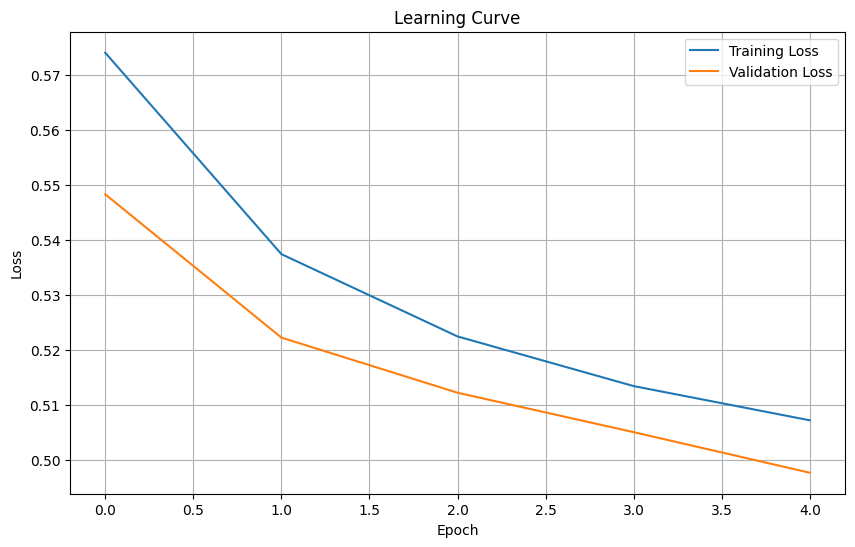

In [124]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Learning Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# Model Testing With Manual Entry

### News

In [125]:
import joblib
import pandas as pd
import numpy as np
from keras.models import load_model

# Load your saved models
LR = joblib.load('Models/LogisticRegression.pkl')
DT = joblib.load('Models/DecisionTree.pkl')
GBC = joblib.load('Models/GradientBoostingClassifier.pkl')
RFC = joblib.load('Models/RandomForestClassifier.pkl')
RNN_model = load_model('Models/RNN_model.h5')
LSTM_model = load_model('Models/LSTM_model.h5')
BiLSTM_model = load_model('Models/BiLSTM_model.h5')

def output_label(label):
    return "Fake" if label == 0 else "Real"

def manual_testing(news):
    # Prepare the input data
    testing_news = {"text": [news]}
    new_def_test = pd.DataFrame(testing_news)
    
    # Assuming wordopt function is defined elsewhere for text preprocessing
    new_def_test["text"] = new_def_test["text"].apply(wordopt)  
    new_x_test = new_def_test["text"]

    # Vectorization for classical models
    new_xv_test = vectorization.transform(new_x_test)

    # Prepare input for RNN model
    new_xv_test_rnn = new_xv_test.toarray()
    new_xv_test_rnn = new_xv_test_rnn.reshape((new_xv_test_rnn.shape[0], 1, new_xv_test_rnn.shape[1]))

    # Make prediction with the RNN model
    pred_RNN = RNN_model.predict(new_xv_test_rnn)
    pred_RNN_label = (pred_RNN > 0.5).astype(int)

    # Prepare input for LSTM model
    new_xv_test_lstm = new_xv_test.toarray()
    new_xv_test_lstm = new_xv_test_lstm.reshape((new_xv_test_lstm.shape[0], 1, new_xv_test_lstm.shape[1]))

    # Make prediction with the LSTM model
    pred_LSTM = LSTM_model.predict(new_xv_test_lstm)
    pred_LSTM_label = (pred_LSTM > 0.5).astype(int)

    # Prepare input for BiLSTM model
    new_xv_test_bilstm = new_xv_test.toarray()
    array_size = new_xv_test_bilstm.size
    batch_size = new_xv_test_bilstm.shape[0]
    total_features = array_size // batch_size

    def find_reshape_shape(array_size, batch_size):
        total_features = array_size // batch_size
        factors = []
        for i in range(1, int(math.sqrt(total_features)) + 1):
            if total_features % i == 0:
                factors.append((i, total_features // i))
        return factors

    factors = find_reshape_shape(array_size, batch_size)
    reshape_timesteps = factors[-1][0]
    reshape_features = factors[-1][1]

    new_xv_test_bilstm = new_xv_test_bilstm.reshape((new_xv_test_bilstm.shape[0], reshape_timesteps, reshape_features))

    # Make prediction with the BiLSTM model
    pred_BiLSTM = BiLSTM_model.predict(new_xv_test_bilstm)
    pred_BiLSTM_label = (pred_BiLSTM > 0.5).astype(int)

    # Make predictions with classical models
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_GBC = GBC.predict(new_xv_test)
    pred_RFC = RFC.predict(new_xv_test)

    # Print predictions
    print("\n\nLR Prediction: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction: {} \nRNN Prediction: {} \nLSTM Prediction: {} \nBiLSTM Prediction: {}".format(
        output_label(pred_LR[0]), 
        output_label(pred_DT[0]), 
        output_label(pred_GBC[0]), 
        output_label(pred_RFC[0]),
        output_label(pred_RNN_label[0][0]),  
        output_label(pred_LSTM_label[0][0]),  
        output_label(pred_BiLSTM_label[0][0])
    ))


In [126]:
news = str(input())
manual_testing(news)


1/1 [==============================] - 1s 1s/step


LR Prediction: Fake 
DT Prediction: Fake 
GBC Prediction: Fake 
RFC Prediction: Fake 
RNN Prediction: Real 
LSTM Prediction: Fake 
BiLSTM Prediction: Fake
